<a href="https://colab.research.google.com/github/ananghw/ananghw/blob/main/W6W7W8_Anang_Hendro_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Situation**

Gustavo just started an e-commerce startup based in Portugal that recently opened an online website to sell their product. Fortunately, Gustavo is launching their website when the Covid-19 hits and making them grow faster than ever. However, Gustavo is still not using targeted marketing which hurts their marketing budget as only a fraction of their user comes back to their website. Gustavo needs your help to increase their marketing conversion rate by doing more targeted marketing user customer segmentation so that it will not hurt their budget.

We use the same dataset as we used in Spreadsheet assignment :

- [order_dataset](https:/https://drive.google.com/file/d/1R9g5f310AA1Zmrnmd8P8jclnyToN54Bx/view/)
- [customers_dataset](https://drive.google.com/file/d/1S_BzA_P4v26oIvErtB4Ta64fQB53Hw1_/view)
- [order_payments_dataset](https://https://drive.google.com/file/d/1JBzMoiRBy6YsxHoS3OhysRcZZyRh5DQD/view)

# **Data Preparation**

In [ ]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#LOAD DATASET : ORDER DATASET
sheet_url = 'https://docs.google.com/spreadsheets/d/1nQn93pTjwdxNFNSxbzUcsh_vUkjWZs8huJm5gKzVnVo/edit#gid=909025464'
sheet_url_trf = sheet_url.replace('edit#gid=','export?format=csv&gid=')
order_dataset_raw = pd.read_csv(sheet_url_trf)
order_dataset_raw.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


In [ ]:
#SHOWS COLUMNS NAME
order_dataset_raw.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

**Column Description of Order Dataset**
*  order_id : unique identifier of the order
*  customer_id :	key to the customer dataset. Each order has a unique customer_id
*   order_status : reference to the order status (delivered, shipped, etc)
*   order_purchase_timestamp : shows the purchase timestamp
*   order_approved_at	: shows the payment approval timestamp
*   order_delivered_carrier_date : shows the order posting timestamp. When it was handled to the logistic partner
*   order_delivered_customer_date	: shows the actual order delivery date to the customer
*   order_estimated_delivery_date	: shows the estimated delivery date that was informed to customer at the purchase moment

In [ ]:
#LOAD DATASET : CUSTOMER DATASET
sheet_url = 'https://docs.google.com/spreadsheets/d/1jPkJmp9oBdAm9BNFtCMhwqom35o5sorhYowCn490tjw/edit#gid=1361213848'
sheet_url_trf = sheet_url.replace('edit#gid=','export?format=csv&gid=')
customer_dataset_raw = pd.read_csv(sheet_url_trf)
customer_dataset_raw

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
#SHOWS COLUMNS NAME
customer_dataset_raw.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

**Column Description of Customer Dataset**
*  customer_id :	key to the orders dataset. Each order has a unique customer_id
*   customer_unique_id :	unique identifier of a customer
*   customer_zip_code_prefix :	first five digits of customer zip code
*   customer_city	: customer city name
*   customer_state :	customer state

In [ ]:
#LOAD DATASET : ORDER PAYMENTS DATASET
sheet_url = 'https://docs.google.com/spreadsheets/d/1_R3q-FdP2MzQZckWeoqOJ4Oo4h4PMNABbe_b-oIfjKU/edit#gid=1119696630'
sheet_url_trf = sheet_url.replace('edit#gid=','export?format=csv&gid=')
order_payments_raw = pd.read_csv(sheet_url_trf)
order_payments_raw.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
#SHOWS COLUMNS NAME
order_payments_raw.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

**Column Description of Order Payments Dataset**
*  order_id :	unique identifier of an order
*   payment_sequential :	a customer may pay an order with more than one payment method. If he does so, a sequence will be created
*   payment_type :	method of payment chosen by the customer
*   payment_installments	: number of installments chosen by the customer
*   payment_value :	transaction value

In [ ]:
#MAKE A COPY OF EACH DATASET
order = order_dataset_raw.copy()
customer = customer_dataset_raw.copy()
payment = order_payments_raw.copy()

# **Remove Irrelevant Value**

In [ ]:
#REMOVE COLUMN FROM ORDER DATASET
order=order.drop(['order_estimated_delivery_date'],axis=1)


I choose to remove the **order_estimated_delivery_date** because for further analysis i'd rather use column like **order_purchase_timestamp**, **order_approved_at** and **order_delivered_customer_date** that shows actual events recorded as timestamp rather than estimated time

In [ ]:
#CHECK THE COLUMNS
order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date'],
      dtype='object')

In [ ]:
#REMOVE COLUMN FROM CUSTOMER DATASET
customer = customer.drop(['customer_zip_code_prefix'],axis=1)

I remove the **customer_zip_code_prefix** as it is not preferrable for the analysis

In [ ]:
#CHECK THE COLUMNS
customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state'], dtype='object')

For order payments dataset we will be using all the column for the analysis

# **Handling Missing Data**

**Checking the rows and columns of order, customer and payment datasets**

In [ ]:
order.shape

(99441, 7)

In [ ]:
customer.shape

(99441, 4)

In [ ]:
payment.shape

(103886, 5)

**Checking null value for each dataset**

In [ ]:
#CHECK THE EMPTY VALUES FROM ORDER DATASET
pd.isnull(order).sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

The null value shown in **order_approved_at**, **order_delivered_carrier_date** and **order_delivered_customer**. It could be happened due to uncompleted or canceled order, so we get to remove the null values.

In [ ]:
#REMOVE THE EMPTY VALUES FROM ORDER DATASET
order = order.dropna()
pd.isnull(order).sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
dtype: int64

In [ ]:
#CHECK THE EMPTY VALUES FROM CUSTOMER DATASET
pd.isnull(customer).sum()

customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

In [ ]:
#CHECK THE EMPTY VALUES FROM PAYMENT DATASET
pd.isnull(payment).sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

we can move forward because null values are not found in the customer and payment dataset

# **Remove Duplicates**

In [ ]:
#REMOVE DUPLICATE FROM ORDER DATASET
print('length of order dataset before =',+(len(order)))
order.drop_duplicates(inplace=True)
print('length of order dataset without duplicate =',+(len(order)))
print('length of original order dataset =',+(len(order_dataset_raw)))

length of order dataset before = 96461
length of order dataset without duplicate = 96461
length of original order dataset = 99441


In [ ]:
#REMOVE DUPLICATE FROM CUSTOMER DATASET
print('length of customer dataset before =',+(len(customer)))
customer.drop_duplicates(inplace=True)
print('length of customer dataset without duplicate =',+(len(customer)))
print('length of original customer dataset =',+(len(customer_dataset_raw)))

length of customer dataset before = 99441
length of customer dataset without duplicate = 99441
length of original customer dataset = 99441


In [ ]:
#REMOVE DUPLICATE FROM PAYMENT DATASET
print('length of payment dataset before =',+(len(payment)))
payment.drop_duplicates(inplace=True)
print('length of paymnet dataset without duplicate =',+(len(payment)))
print('length of original payment dataset =',+(len(order_payments_raw)))


length of payment dataset before = 103886
length of paymnet dataset without duplicate = 103886
length of original payment dataset = 103886


Each of the datasets contains no duplicate

# **Handling Outlier**

In [ ]:
#CHECKING THE TYPES OF EACH DATA COLUMNS
order.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
dtype: object

In [ ]:
#CHECKING THE TYPES OF EACH DATA COLUMNS
customer.dtypes

customer_id           object
customer_unique_id    object
customer_city         object
customer_state        object
dtype: object

In [ ]:
#CHECKING THE TYPES OF EACH DATA COLUMNS
payment.dtypes

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

For payment dataset, there are numerical columns that we need to check for outliers

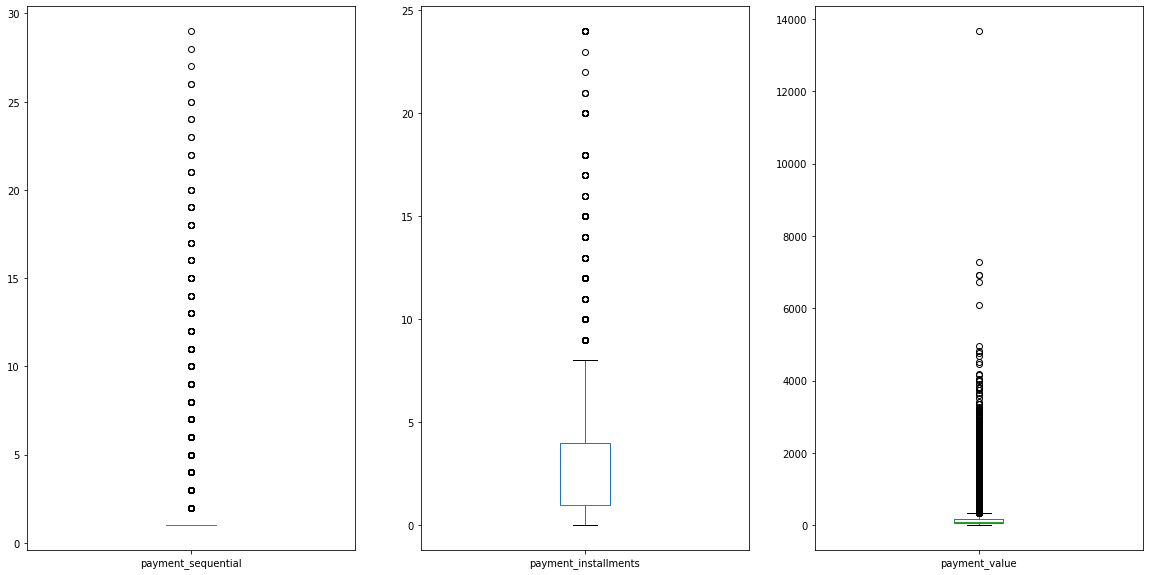

In [ ]:
#VISUALIZE THE NUMERICAL COLUMNS USING BOXPLOT
payment.columns
numerical_column = ['payment_sequential','payment_installments','payment_value']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = payment.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

As seen on the boxplot, there are several major outliers on the payment value column. For the payment_sequential and payment_installments, the value outside the boxplot is not actually that far from the outer upper value so we just gonna include it in the analysis. 

In [ ]:
#CALCULATE MEAN BEFORE OUTLIERS REMOVAL
payment[('payment_value')].mean()

154.10038041698365

In [ ]:
#CALCULATE QUANTILE AND IQR FOR OUTLIER REMOVAL
K_Q1 = payment['payment_value'].quantile(0.25)
K_Q3 = payment['payment_value'].quantile(0.75)
K_IQR = K_Q3 - K_Q1
K_Boxplot_Min = K_Q1 - 1.5*K_IQR
K_Boxplot_Max = K_Q3 + 1.5*K_IQR

print('Q1 = ',K_Q1)
print('Q3 = ',K_Q3)
print('IQR = ',K_IQR)
print('Min = ',K_Boxplot_Min)
print('Max = ',K_Boxplot_Max)

Q1 =  56.79
Q3 =  171.8375
IQR =  115.04750000000001
Min =  -115.78125000000003
Max =  344.40875000000005


In [ ]:
#REMOVING THE OUTLIERS
payment=payment[(payment['payment_value']>=K_Boxplot_Min) & (payment['payment_value']<K_Boxplot_Max)]

In [ ]:
#CALCULATE MEAN AFTER OUTLIERS REMOVAL
payment[('payment_value')].mean()

110.06213346540068

There are indeed a differences in mean values after outliers removal

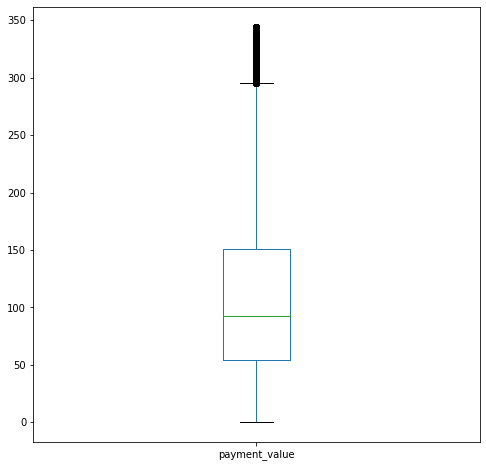

In [ ]:
#VISUALIZE THE DATA AFTER OUTLIERS REMOVAL USING BOXPLOT
payment.boxplot(column='payment_value', fontsize=10, rot=0, grid=False, figsize=(8, 8))

# **Join Dataset**

In [ ]:
#JOIN ORDER WITH CUSTOMER DATASET
join_1 = order.merge(customer, how = 'inner', on = 'customer_id')

In [ ]:
join_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [ ]:
print('Data length of join_1 dataset is',len(join_1))

Data length of join_1 dataset is 96461


In [ ]:
#JOIN ORDER AND CUSTOMER DATASET WITH PAYMENTS DATASET
joined = join_1.merge(payment, how='inner',on='order_id')

In [ ]:
joined.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12


In [ ]:
print('Data length of joined dataset is', len(joined))

Data length of joined dataset is 93106


# **Descriptive Statistics**

In [ ]:
from scipy import stats


def describe(df, statis):
  d = joined.describe()
  if 'mode' in statis:
    statis.remove('mode')
    d = d.append(joined.agg(statis))
    d = d.append(joined.agg(lambda x: stats.mode(x)[0]))
  else: 
    d = d.append(joined.agg(statis))

  return d


describe(joined, ['skew', 'mad','kurt','mode'])

,payment_sequential,payment_installments,payment_value,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_type
count,93106.000000,93106.000000,93106.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.094827,2.629390,110.011894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.677960,2.451304,72.682926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,1.000000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,1.000000,92.205000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,150.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,26.000000,24.000000,344.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skew,14.557361,1.792364,0.998451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mad,0.180926,1.872394,58.130078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0 indicate the mode of the data

In [ ]:
#CALCULATE RANGE
range_sqnt = max(joined['payment_sequential'])-min(joined['payment_sequential'])
range_install = max(joined['payment_installments'])-min(joined['payment_installments'])
range_payment = max(joined['payment_value'])-min(joined['payment_value'])

print('range of payment_sequential = ',range_sqnt)
print('range of payment_installments = ',range_install)
print('range of payment_value = ',range_payment)

range of payment_sequential =  25
range of payment_installments =  24
range of payment_value =  344.34


In [ ]:
import statistics

In [ ]:
#CALCULATE VARIANCE
var_sqnt = statistics.variance(joined['payment_sequential'])
var_install = statistics.variance(joined['payment_installments'])
var_payment = statistics.variance(joined['payment_value'])

print('variance payment_sequential = ',var_sqnt)
print('variance payment_installments = ',var_install)
print('variance payment_value = ',var_payment)

variance payment_sequential =  0.45962911633461684
variance payment_installments =  6.0088903579092445
variance payment_value =  5282.807723755086


In [ ]:
#CALCULATE COEFFICIENT OF VARIATION
cov_sqnt = np.std(joined['payment_sequential'])/np.mean(joined['payment_sequential'])
cov_install = np.std(joined['payment_installments'])/np.mean(joined['payment_installments'])
cov_payment = np.std(joined['payment_value'])/np.mean(joined['payment_value'])

print('coef of variance payment_sequential = ',cov_sqnt)
print('coef of variance payment_installments = ',cov_install)
print('coef of variance payment_value = ',cov_payment)

coef of variance payment_sequential =  0.619235399727933
coef of variance payment_installments =  0.9322658475464549
coef of variance payment_value =  0.6606788865834701


In [ ]:
joined[['customer_city','customer_state','payment_type']].describe()

,customer_city,customer_state,payment_type
count,93106,93106,93106
unique,3965,27,4
top,sao paulo,SP,credit_card
freq,14741,39706,68325


From the descriptive analysis, we can get several insights :

* There are 93106 transactions on the dataset
* The average and mode of payment sequential is 1, it means that most customer usually only use one types of payment types.
* The mode of payment installments is 1 meaning that most customers usually only pay in single installments
* The average payment values is 110 with the smallest being 0 and the biggest being 344. 
* All of payment columns skewed positively (as seen on the histogram)
* The city with the most transactions is sao paulo with 14741 transactions.
* The state with the most transactions is SP with 39706 transactions
* Most preferred payment types is credit card with 68325 transactions
* The dataset consist of transactions from 27 states and 3965 cities with 4 different payment types





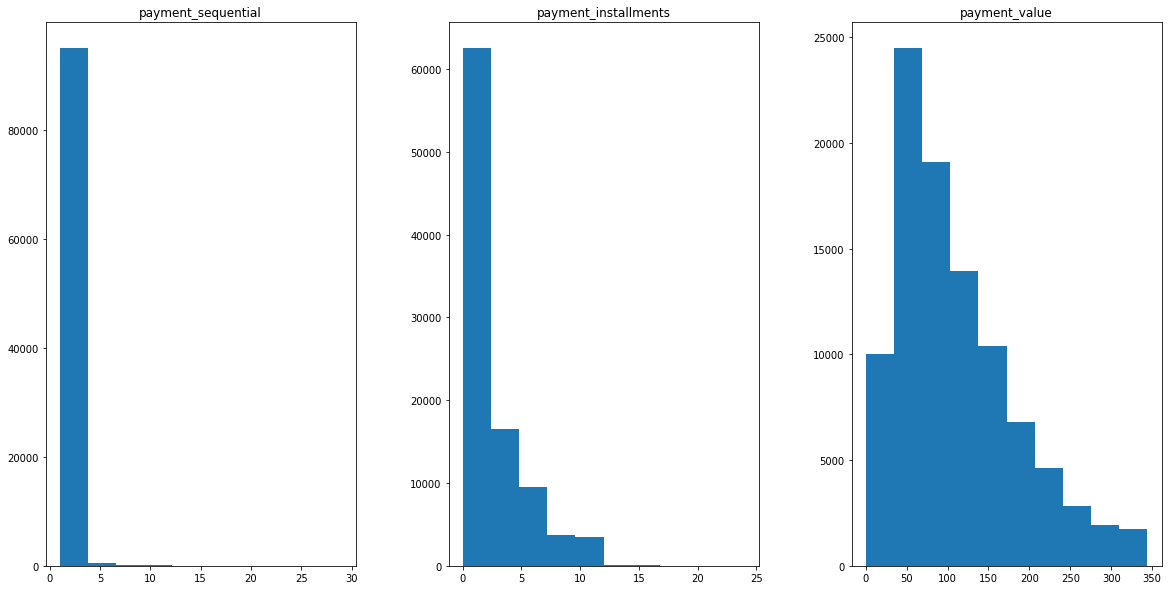

In [ ]:
#VISUALIZE THE SKEWNESS USING HISTOGRAM
joined.columns
numeric_column = ['payment_sequential','payment_installments','payment_value']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = payment.hist(el, ax=axes.flatten()[i],grid=False)
plt.show()

# **Exploratory Data Analysis**

  ## 1. Number of Order per Months




In [ ]:
#CHECK THE DATA TYPES
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93106 entries, 0 to 93105
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       93106 non-null  object 
 1   customer_id                    93106 non-null  object 
 2   order_status                   93106 non-null  object 
 3   order_purchase_timestamp       93106 non-null  object 
 4   order_approved_at              93106 non-null  object 
 5   order_delivered_carrier_date   93106 non-null  object 
 6   order_delivered_customer_date  93106 non-null  object 
 7   customer_unique_id             93106 non-null  object 
 8   customer_city                  93106 non-null  object 
 9   customer_state                 93106 non-null  object 
 10  payment_sequential             93106 non-null  int64  
 11  payment_type                   93106 non-null  object 
 12  payment_installments           93106 non-null 

Because the timestamp data is in object type we need to convert the data into its appropriate types. To calculate number of order per month we will need to count the order of each month and group it per month

In [ ]:
#ADD COLUMN ORDER MONTH TO THE DATASET
eda1 = joined.copy()
eda1['order_month'] = pd.to_datetime(eda1['order_purchase_timestamp']).dt.month
eda1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,8


In [ ]:
#GROUP COUNT OF ORDER EACH MONTH
eda1a = eda1.groupby('order_month',as_index=False)['order_purchase_timestamp'].count()
eda1a

,order_month,order_purchase_timestamp
0,1,7547
1,2,7930
2,3,9223
3,4,8733
4,5,9947
5,6,8918
6,7,9724
7,8,10151
8,9,4010
9,10,4567


[Text(0, 0.5, 'Number of Orders'), Text(0.5, 0, 'Order Months')]

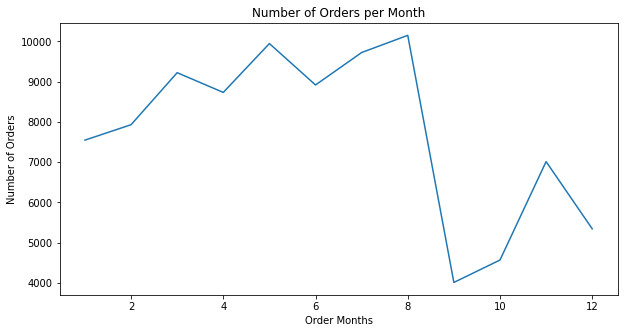

In [ ]:
#VISUALIZE USING BAR CHART
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.lineplot(x='order_month', y='order_purchase_timestamp', data=eda1a, ci=None,palette="Blues_d")
plt.title('Number of Orders per Month')
ax.set(xlabel='Order Months', ylabel='Number of Orders')

The above graph shows number of orders each month regardless of the year (accumulation of all years). Based on the chart, the number of order generally increase in the first two quarters. However, in the third quarter, starting from September, the orders declined into the lower number. The following months October shows increment up until November and jump down in December. 

We will separated the number of orders per month by years

In [ ]:
#ADD NEW COLUMN, CONVERT DATA TYPES AND GROUPING
eda1['order_year'] = pd.to_datetime(eda1['order_purchase_timestamp']).dt.year
eda1b = eda1.groupby(['order_year','order_month'],as_index=False)['order_purchase_timestamp'].count()
eda1b

,order_year,order_month,order_purchase_timestamp
0,2016,10,256
1,2016,12,1
2,2017,1,708
3,2017,2,1605
4,2017,3,2494
5,2017,4,2231
6,2017,5,3502
7,2017,6,3094
8,2017,7,3884
9,2017,8,4077


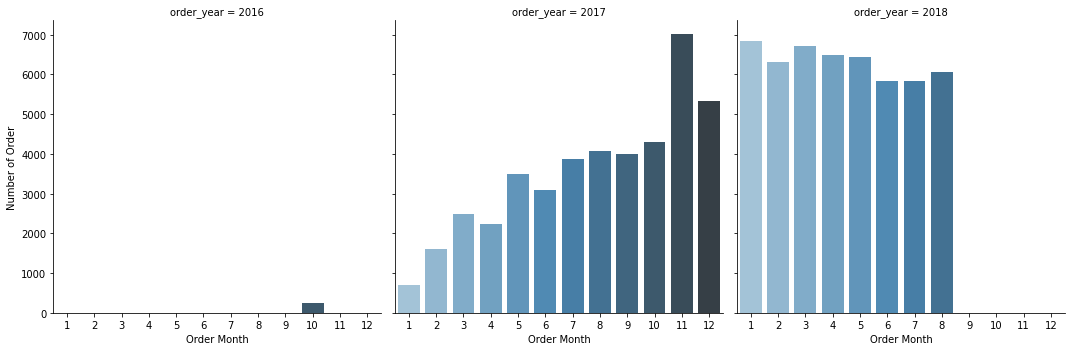

In [ ]:
#VISUALIZE USING BAR CHART PER ORDER YEAR
ax = sns.catplot(x='order_month',y='order_purchase_timestamp',col='order_year',kind='bar',ci=None,data=eda1b,palette="Blues_d")
ax.set(xlabel='Order Month', ylabel='Number of Order')

From the chart, we can see the number of orders per month grouped by order year. In 2016 we don't see any order except for October. In 2017, the number of orders generally increase throughout the year, peaking in November. Number of orders jumping down in December 2017. In 2018, the number of orders is stable without extreme increment/decrement. The number of orders is noticably higher than the previous year with January's order being very similar with orders of November 2017 and keep performing well for the upcoming months. 

##2. Daily order trends (which day is the busiest)

In [ ]:
#CONVERT DATA TYPE AND NEW COLUMN
eda2 = joined.copy()
eda2['order_day'] = pd.to_datetime(eda1['order_purchase_timestamp']).dt.day_name()
eda2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,Monday
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00,Monday
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59,Monday
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,Tuesday
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,Wednesday


In [ ]:
#ORDER DAY IN ACTUAL DAILY ORDER
from pandas.api.types import CategoricalDtype
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
eda2['order_day'] = eda2['order_day'].astype(cat_type)

In [ ]:
#CALCULATE ORDER PER DAY
eda2 = eda2.groupby(['order_day'],as_index=False)['order_purchase_timestamp'].count()
eda2

,order_day,order_purchase_timestamp
0,Monday,15102
1,Tuesday,15011
2,Wednesday,14542
3,Thursday,13851
4,Friday,13184
5,Saturday,10160
6,Sunday,11256


[Text(0, 0.5, 'Number of Order'), Text(0.5, 0, 'Order Day')]

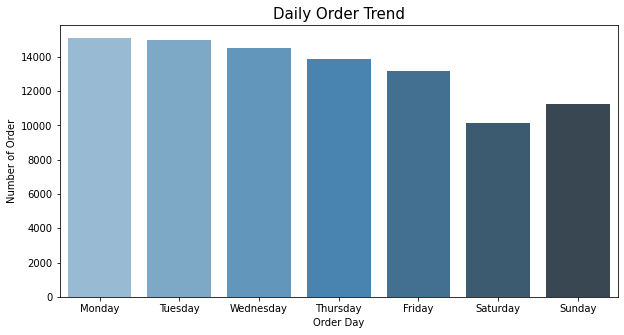

In [ ]:
#VISUALIZE IN BARCHART
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='order_day', y='order_purchase_timestamp', data=eda2, orient='v', ci=None,palette="Blues_d")
plt.title('Daily Order Trend',fontsize=15)
ax.set(xlabel='Order Day', ylabel='Number of Order')


From the "Daily Order Trend" graph you could see that highest order occured on monday. Higher number of orders generally happened on weekdays rather than the weekend.The number of orders keep decreasing as days progressed. These trend could means that weekdays order generally happens because customers usually want to received the order in the same week or assume that delivery time is shorter because it is within the same week. Other possible reason that in the weekend the customers could be doing other activities other than browsing and ordering the products. By giving special promo or discount code could potentially increase the orders even more.


##3. Percentages of orders per payment type


In [ ]:
eda3 = joined.copy()
eda3.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12


In [ ]:
#CALCULATE NUMBER OF ORDER FOR EACH PAYMENT TYPES
eda3 = eda3.groupby(['payment_type'],as_index=False)['order_id'].count()
eda3

,payment_type,order_id
0,boleto,17953
1,credit_card,68325
2,debit_card,1406
3,voucher,5422


In [ ]:
#SHOW PERCENTAGE NUMBER OF ORDERS FOR EACH PAYMENT TYPES
eda3['percentage'] = (eda3['order_id']/eda3['order_id'].sum())*100
eda3

,payment_type,order_id,percentage
0,boleto,17953,19.282323
1,credit_card,68325,73.384100
2,debit_card,1406,1.510107
3,voucher,5422,5.823470


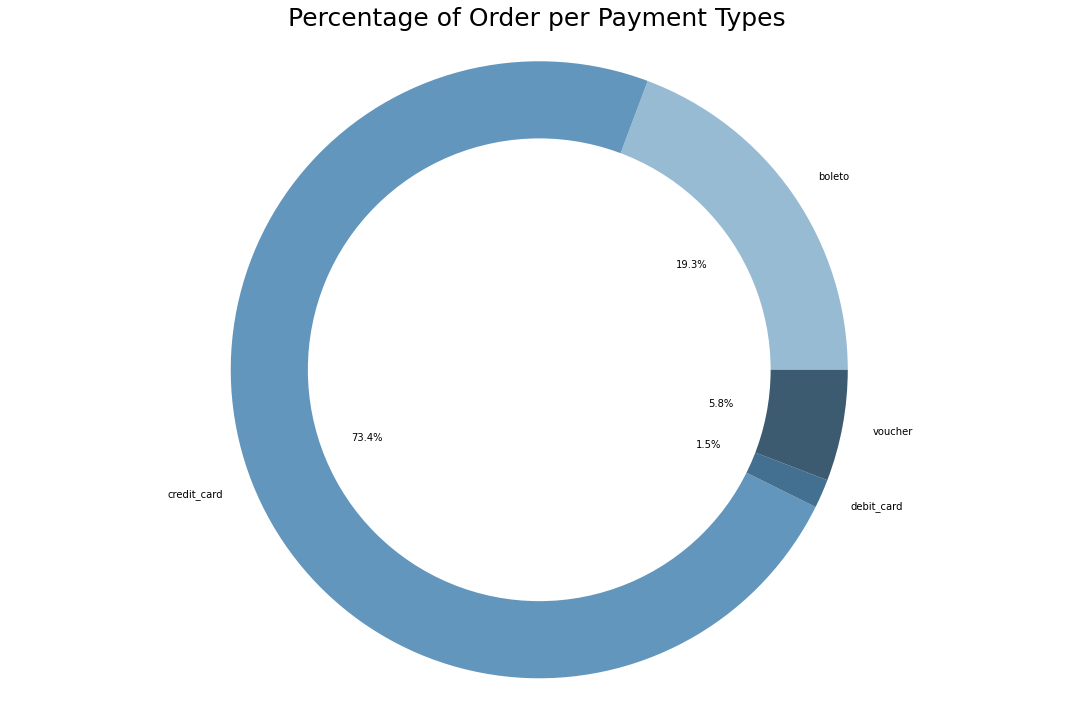

In [ ]:
#VISUALIZE WITH PIE CHART
plt.figure(figsize=(15, 10))
my_data = eda3['order_id']
my_labels = eda3['payment_type']
colors = ['#98bbd4','#6296bc','#436f90','#3d5b70']

plt.pie(my_data,colors=colors,labels=my_labels,autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Order per Payment Types', fontsize=25)
plt.axis('equal')
plt.tight_layout()
plt.show()

Percentages of order per payment types shows that highest payment type of choice is credit card with 73,4%, followed by boleto (19.3%), voucher (5.8%) and debit card (1.5%). With these finding, the company could made special promotion or discount for credit card payment to keep the usage of credit card payment in the higher percentage or even increase it. 

# **User Segmentation using Cluster Analysis**

In [ ]:
raw = joined.copy()
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93106 entries, 0 to 93105
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       93106 non-null  object 
 1   customer_id                    93106 non-null  object 
 2   order_status                   93106 non-null  object 
 3   order_purchase_timestamp       93106 non-null  object 
 4   order_approved_at              93106 non-null  object 
 5   order_delivered_carrier_date   93106 non-null  object 
 6   order_delivered_customer_date  93106 non-null  object 
 7   customer_unique_id             93106 non-null  object 
 8   customer_city                  93106 non-null  object 
 9   customer_state                 93106 non-null  object 
 10  payment_sequential             93106 non-null  int64  
 11  payment_type                   93106 non-null  object 
 12  payment_installments           93106 non-null 

In [ ]:
raw.describe()

,payment_sequential,payment_installments,payment_value
count,93106.000000,93106.000000,93106.000000
mean,1.094827,2.629390,110.011894
std,0.677960,2.451304,72.682926
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.205000
75%,1.000000,3.000000,150.460000
max,26.000000,24.000000,344.340000


In [ ]:
raw[['customer_city','customer_state','payment_type']].describe()

,customer_city,customer_state,payment_type
count,93106,93106,93106
unique,3965,27,4
top,sao paulo,SP,credit_card
freq,14741,39706,68325


In [ ]:
df_cluster = raw.copy()


* The average and mode of payment sequential is 1, it means that most customer usually only use one types of payment types.
* The mode of payment installments is 1 meaning that most customers usually only pay in single installments
* The average payment values is 110 with the smallest being 0 and the biggest being 344.
* The city with the most transactions is sao paulo with 14741 transactions.
* The state with the most transactions is SP with 39706 transactions
* Most preferred payment types is credit card with 68325 transactions



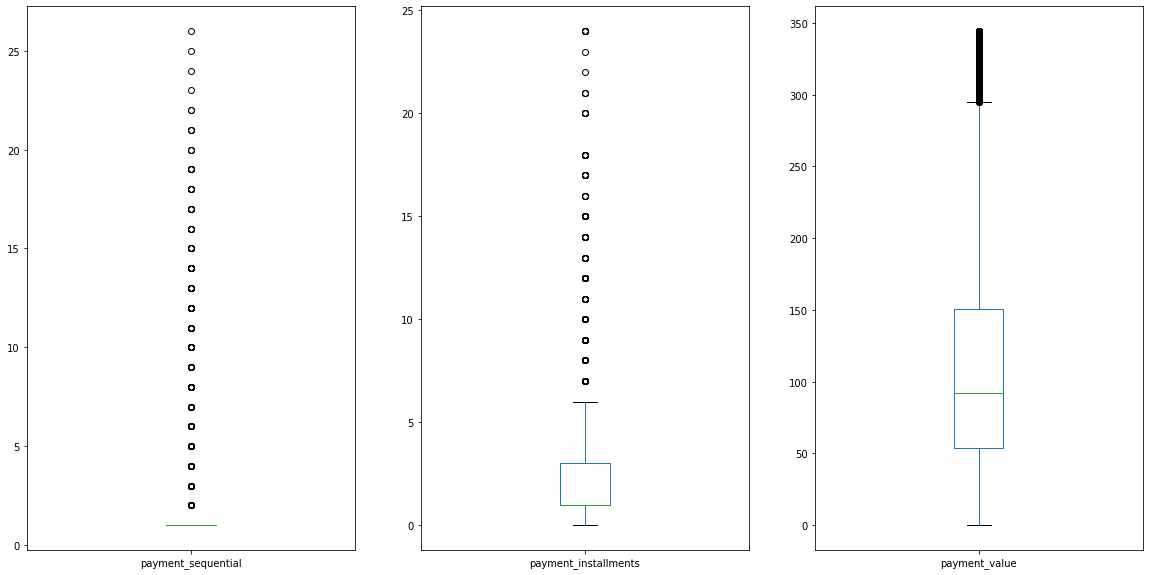

In [ ]:
#VISUALIZE THE NUMERICAL COLUMN
num_column = ['payment_sequential','payment_installments','payment_value']

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df_cluster.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

For categorical-type columns we need to transform it into numerical-type columns

In [ ]:
#MAKE DUMMY DATASET AND MERGE THE DATASET
dum_df = pd.get_dummies(df_cluster, columns=["payment_type"], prefix=["payment_type"])
df_cluster = df_cluster.merge(dum_df)
df_cluster

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,0,1,0,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00,0,0,0,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59,0,0,0,1
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,1,0,0,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93101,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 9:05:12,2017-02-23 9:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,831ce3f1bacbd424fc4e38fbd4d66d29,sao paulo,SP,1,credit_card,3,155.99,0,1,0,0
93102,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,credit_card,3,85.08,0,1,0,0
93103,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,credit_card,3,195.00,0,1,0,0
93104,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,credit_card,5,271.01,0,1,0,0


In [ ]:
#REMOVE IRRELEVANT COLUMNS
df_cluster = df_cluster.drop(['order_id','customer_id','order_status','order_purchase_timestamp',
                              'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
                              'customer_unique_id','customer_city','customer_state','payment_type'],axis=1)

In [ ]:
#IMPORT LIBRARY
from sklearn.datasets import make_blobs
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [ ]:
#STANDARDIZE THE NUMERICAL VALUE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cluster[num_column] = scaler.fit_transform(df_cluster[num_column])
df_cluster

,payment_sequential,payment_installments,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,0.00,0.041667,0.052622,0,1,0,0
1,0.08,0.041667,0.005808,0,0,0,1
2,0.04,0.041667,0.053987,0,0,0,1
3,0.00,0.041667,0.410815,1,0,0,0
4,0.00,0.125000,0.520184,0,1,0,0
...,...,...,...,...,...,...,...
93101,0.00,0.125000,0.453012,0,1,0,0
93102,0.00,0.125000,0.247081,0,1,0,0
93103,0.00,0.125000,0.566301,0,1,0,0
93104,0.00,0.208333,0.787042,0,1,0,0


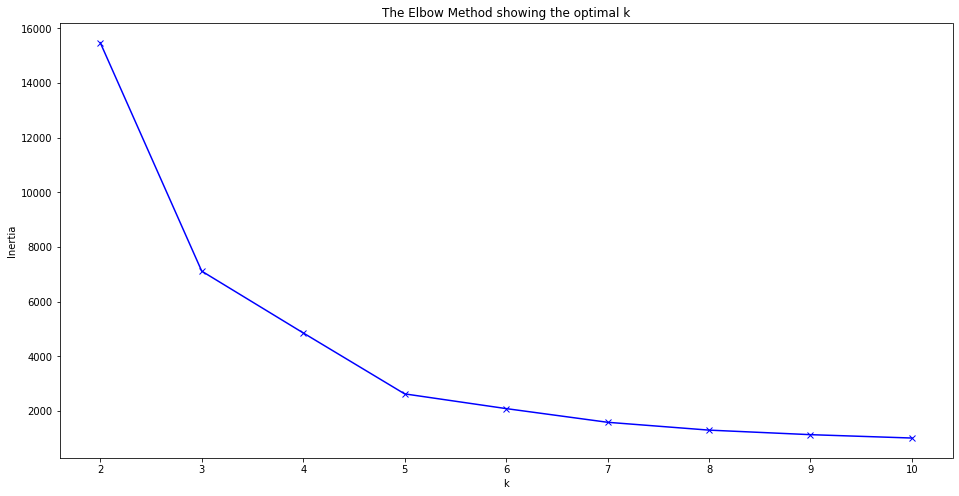

In [ ]:
#FIND OPTIMAL K
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

From the elbow method we could see 'sharp' changes in n=3, n=4 and n=5. Lets check the optimum n, using silhouette analysis

For n_clusters = 2 The average silhouette_score is : 0.7243029492624402
For n_clusters = 3 The average silhouette_score is : 0.7990098651384397
For n_clusters = 4 The average silhouette_score is : 0.8194417362296466
For n_clusters = 5 The average silhouette_score is : 0.6122814745768793
For n_clusters = 6 The average silhouette_score is : 0.5491277993683532
For n_clusters = 7 The average silhouette_score is : 0.5086057744266824
For n_clusters = 8 The average silhouette_score is : 0.5286603677602545
For n_clusters = 9 The average silhouette_score is : 0.4878080059738101
For n_clusters = 10 The average silhouette_score is : 0.4984470481729299


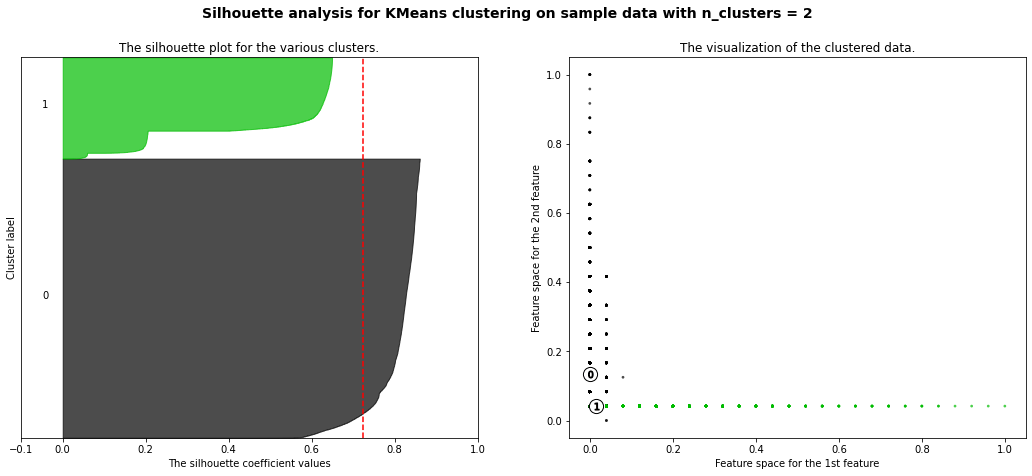

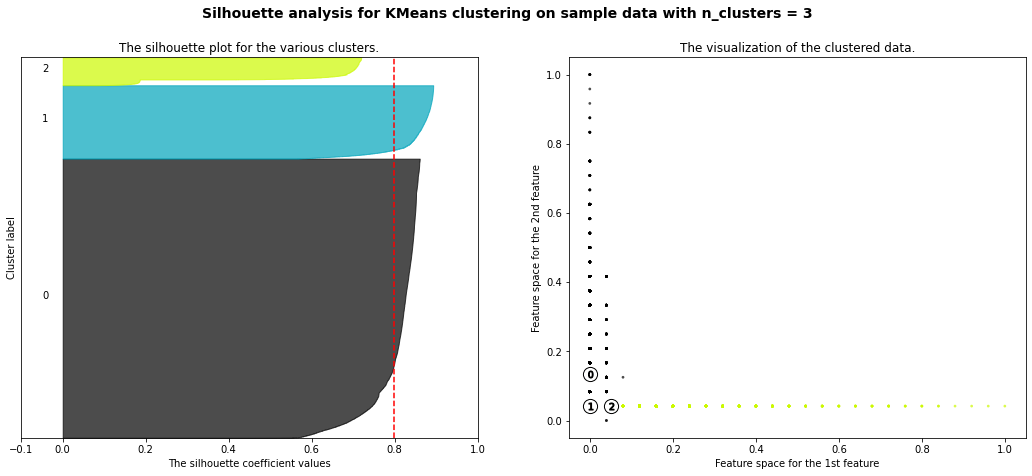

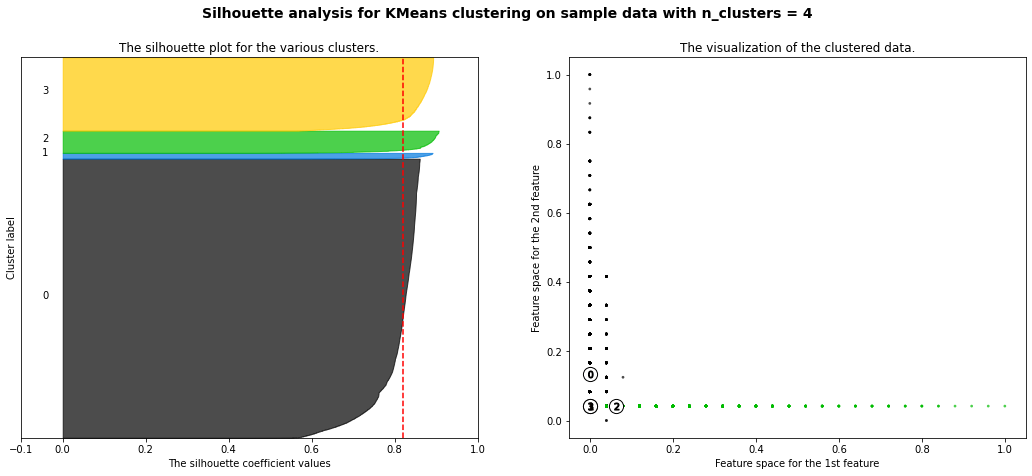

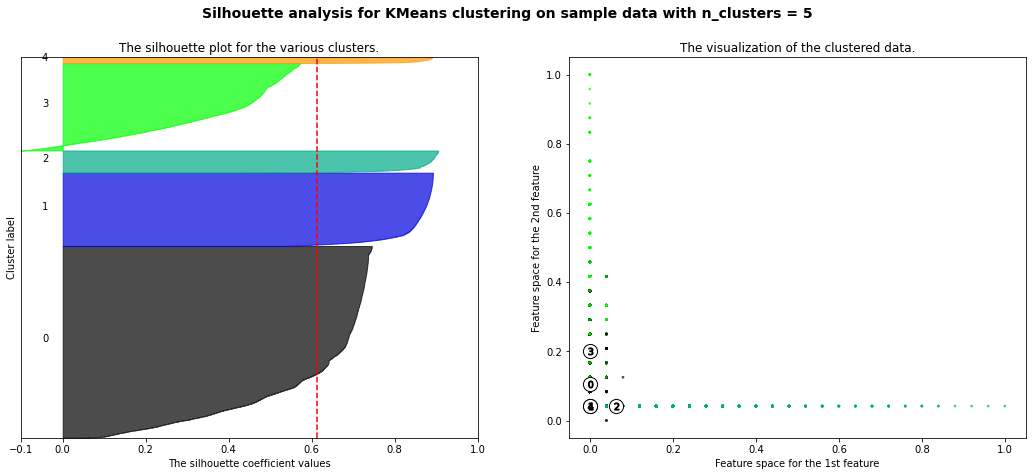

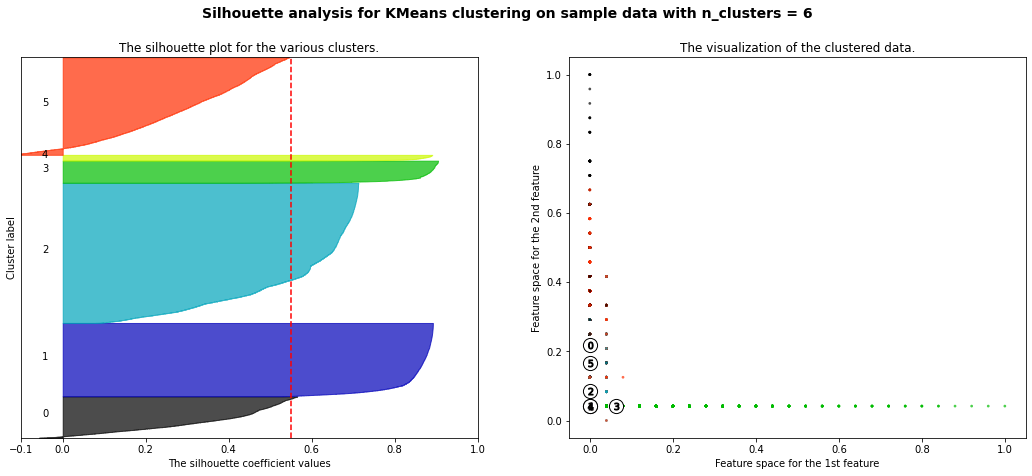

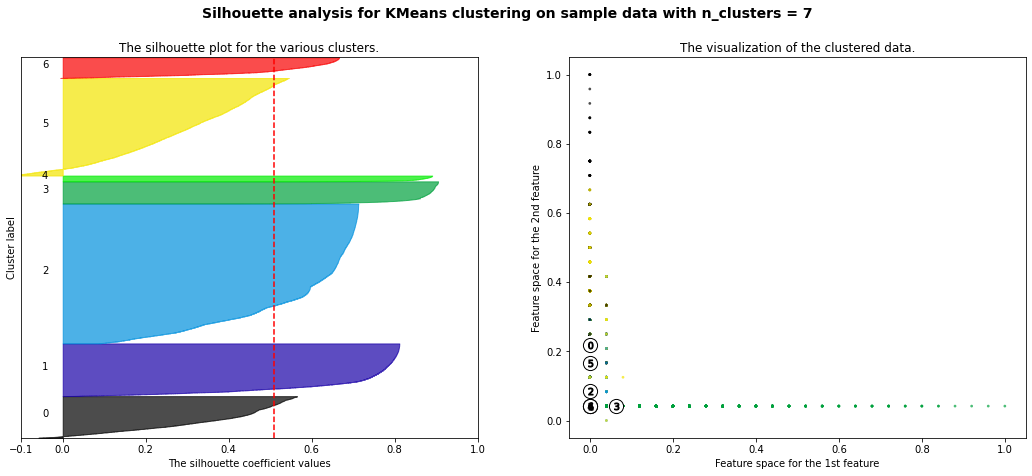

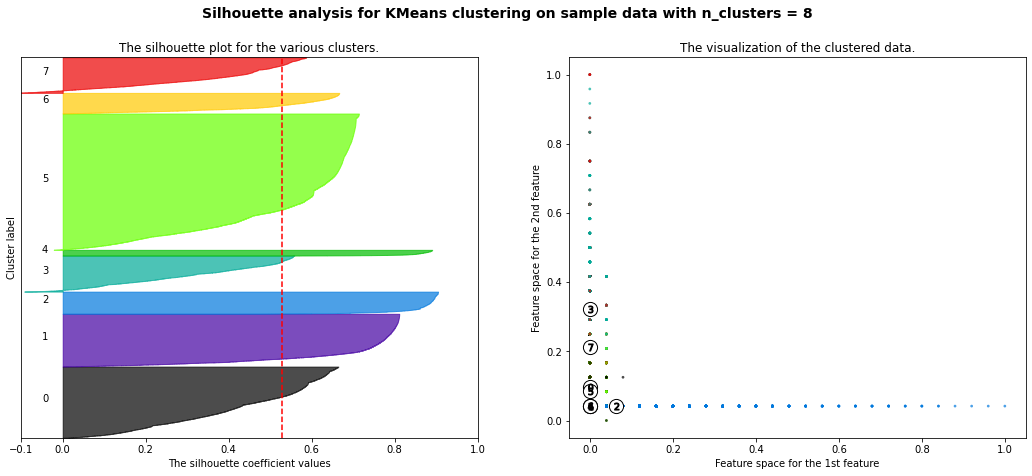

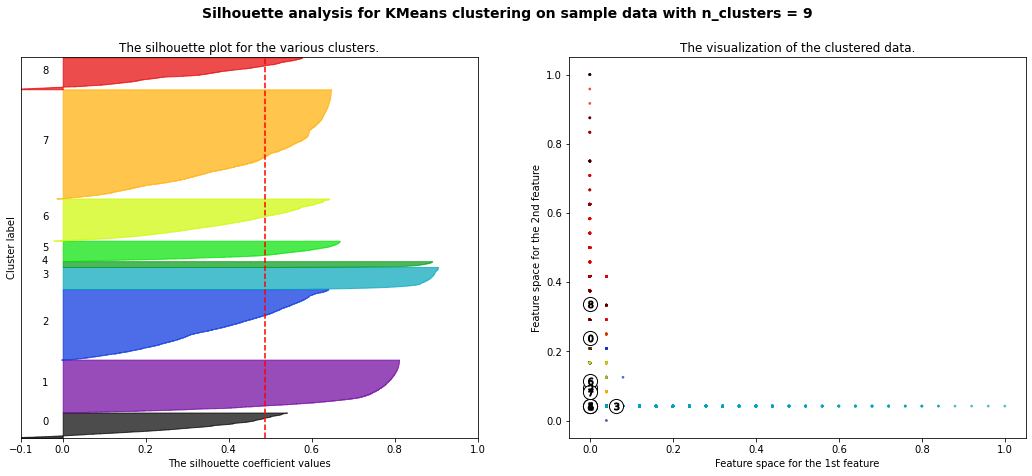

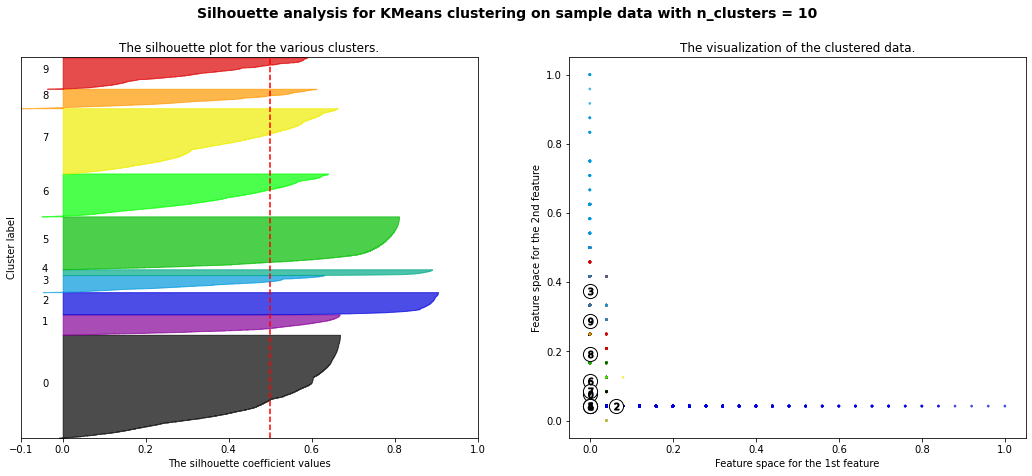

In [ ]:
#CHECK THE SILHOUETTE SCORE
silhoutte_analysis(df_cluster,list(range(2,11)))

From the silhouette analysis, the n_clusters of 4 shows highest number with 0,819 so we will use that. 

In [ ]:
#CLUSTERING
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_cluster)
cluster_label = cluster_model.labels_
raw['cluster'] = cluster_label
raw

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,1
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00,2
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59,2
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93101,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 9:05:12,2017-02-23 9:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,831ce3f1bacbd424fc4e38fbd4d66d29,sao paulo,SP,1,credit_card,3,155.99,1
93102,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,credit_card,3,85.08,1
93103,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,credit_card,3,195.00,1
93104,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,credit_card,5,271.01,1


There is added columns with number of cluster on each row of data. We can continue by see the trend of each cluster and naming each cluster

In [ ]:
raw.groupby(['cluster'])['payment_value'].agg(['sum','count','mean','median','max','min'])

,sum,count,mean,median,max,min
cluster,,,,,,
0,4372900.46,21358,204.742975,191.58,344.34,112.91
1,1917751.94,17953,106.820695,87.38,344.33,11.62
2,446585.44,6828,65.405015,47.70,341.02,0.00
3,3505529.56,46967,74.638141,71.53,149.25,0.01


In [ ]:
raw.groupby(['cluster'])['payment_installments'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,21358,4.805085,4.0,24,1
1,17953,1.000000,1.0,1,1
2,6828,1.000000,1.0,1,1
3,46967,2.499713,2.0,11,0


In [ ]:
raw.groupby(['cluster'])['payment_sequential'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,21358,1.002997,1.0,2,1
1,17953,1.000056,1.0,2,1
2,6828,2.252343,2.0,26,1
3,46967,1.004535,1.0,3,1


In [ ]:
raw.groupby(['cluster','payment_type'])['payment_sequential'].agg(['count','mean','median','max','min'])

count      mean  median  max  min
cluster payment_type                                   
0       credit_card   21358  1.002997     1.0    2    1
1       boleto        17953  1.000056     1.0    2    1
2       debit_card     1406  1.034851     1.0    3    1
        voucher        5422  2.568056     2.0   26    1
3       credit_card   46967  1.004535     1.0    3    1


**Clusters Profile**

1. Cluster 0, consists of customers with **high payment values** but prefer **longer installments** as seen on the mean of the payment installments. We could assume that people in this cluster tend to buy expensive things such as the newest gadgets, trendy clothes or viral skincares, therefore they choose to have longer installments as it is hard to pay such big money in a single time. With that assumptions, we could say that this specific cluster consists of young people or people in their early career who need to be updated with the trends (need another dataset to confirm). The cluster 0 prefer **single sequential** payment using **credit cards** as is it possible to have long-term installments plans. Hence, we can call these cluster as "High Spending Trendy Group"
 
2. Cluster 1, consists of customers with medium payment values who prefer single installment payment. We could assume that people in this cluster are adults or older adults who had established jobs/careers because they could afford to spend quite high payments in a single payment. They could be purchasing stuff for their own space e.g furniture, home decor, etc, or even for their hobbies (need another dataset to confirm). They pay with a single sequential using boleto. Boleto is commonly used in Brazil by older people who feel that Boleto is safer and more convenient than banking payments such as credit/debit cards. We can call these cluster as "Medium Spending Established Group"
 
3. Cluster 2, consists of customers with low payment values who prefer single installment payment. This cluster specifically tends to pay in double sequential payments using debit cards combine with vouchers. We could assume that people in this cluster only purchase cheap items or items that they specifically need to buy e.g groceries, food, etc, considering their payment choices. This cluster could be consist of people with lower incomes or people with frugal life as they preferred to split the payments to different methods in order to portion their spending or get cheaper prices. We can call these cluster as "Low Spending Frugal Group"
 
4. Cluster 3, consists of customers with high payment values with double installments payment with preferred single payment type using a credit card. This cluster shows similarity with Cluster 0 with the only difference being shorter payment installments. With that being said, we could assume that they had similar customer types with a tendency to purchase expensive products. However, shorter payment installment could mean that financially they're doing better than people in Cluster 0. They still want to keep up with the trends but also want to portion their spending by splitting the payment. We can call these cluster as "High Spending Mindful Group"



After naming the clusters we can assign the new name into the dataset.

In [ ]:
#ASSIGN THE NAME OF EACH CLUSTER
raw['cluster'] = raw['cluster'].map({  
    0: 'High Spending Trendy Group',  
    1: 'Medium Spending Established Group',  
    2: 'Low Spending Frugal Group',  
    3: 'High Spending Mindful Group',  
})

raw

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,High Spending Trendy Group
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3,voucher,1,2.00,Low Spending Frugal Group
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,voucher,1,18.59,Low Spending Frugal Group
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,Medium Spending Established Group
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,High Spending Trendy Group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93101,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 9:05:12,2017-02-23 9:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,831ce3f1bacbd424fc4e38fbd4d66d29,sao paulo,SP,1,credit_card,3,155.99,High Spending Trendy Group
93102,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05,2017-03-09 9:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,credit_card,3,85.08,High Spending Trendy Group
93103,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,praia grande,SP,1,credit_card,3,195.00,High Spending Trendy Group
93104,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,1,credit_card,5,271.01,High Spending Trendy Group


# **Conclusion**

The current analysis could be useful to a certain extent. However, several issues could be addressed in addition to another dataset so that it can help define the problems more clearly.

# **Suggestion**

1. With different types of clusters having different types of behavior, each of these clusters needs different approaches and marketing techniques
 
2. For 'High Spending Trendy Group' and 'High Spending Mindful Group' the company could push more trendy items such as gadgets or fashion items to them specifically and offer various installment payments as they usually spend in higher values.
 
3. For 'Medium Spending Established Group', the company could offer a special discount/promotion code using boleto as all of the people in this cluster only use boleto

4. For 'Low Spending Frugal Group', the company could offer special prices or discounts on groceries or daily products. The company could also hold special event/promo where people could buy products in bundles with special prices and give promos within their chosen payment types (debit cards and vouchers)
